# DASC 512 - 23 - Tests of Variability

This lessons focuses on **hypothesis tests relating to variance**.

***


In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.graphics.api as smg

sns.set_style('whitegrid')

## One-Sample Test of Variance (Chi-Squared)

Below is the code used to generate the images showing the rejection regions for one- and two-tailed Chi-Squared tests.

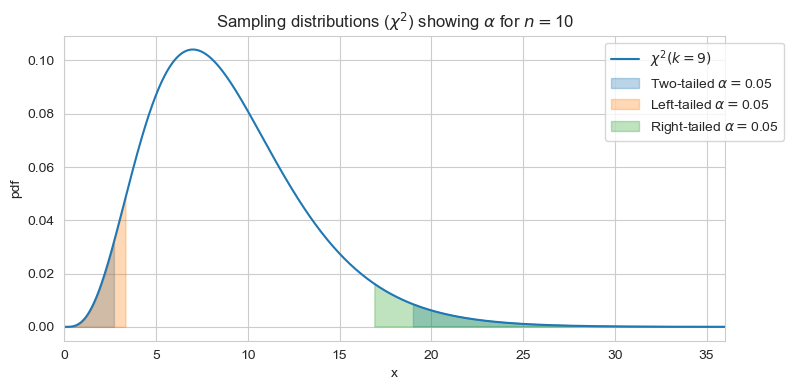

In [2]:
# Plot of two-sided test distributions with alpha
n = 10
df = n - 1
alpha = 0.05

dist1 = stats.chi2(df=df)

pdf_x = np.linspace(start=0, stop=df * 7, num=1000)  
pdf1 = [(dist1.pdf(x=x)) for x in pdf_x]

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(pdf_x, pdf1, label=f'$\chi^2(k={df})$')

# Plot alpha area (two-tailed)
fill_alpha_left = np.linspace(start=0, stop=dist1.ppf(alpha/2), num=1000)
fill_left = [(dist1.pdf(x=x)) for x in fill_alpha_left]
ax.fill_between(x=fill_alpha_left, y1=0, y2=fill_left, color='C0', alpha=0.3, 
                label=r'Two-tailed $\alpha = $'+f'{alpha:.2f}')
fill_alpha_right = np.linspace(start=dist1.isf(alpha/2), stop=df * 7, num=1000)
fill_right = [(dist1.pdf(x=x)) for x in fill_alpha_right]
ax.fill_between(x=fill_alpha_right, y1=0, y2=fill_right, color='C0', alpha=0.3)

# Plot alpha area (one-tailed)
if True:  # Change to false to remove one-tailed
    fill_alpha_left = np.linspace(start=0, stop=dist1.ppf(alpha), num=1000)
    fill_left = [(dist1.pdf(x=x)) for x in fill_alpha_left]
    ax.fill_between(x=fill_alpha_left, y1=0, y2=fill_left, color='C1', alpha=0.3, 
                    label=r'Left-tailed $\alpha = $'+f'{alpha:.2f}')
    fill_alpha_right = np.linspace(start=dist1.isf(alpha), stop=df * 7, num=1000)
    fill_right = [(dist1.pdf(x=x)) for x in fill_alpha_right]
    ax.fill_between(x=fill_alpha_right, y1=0, y2=fill_right, color='C2', alpha=0.3, 
                    label=r'Right-tailed $\alpha = $'+f'{alpha:.2f}')

# Tweak graphic
ax.set_title(r'Sampling distributions ($\chi^2$) showing $\alpha$ for $n = $'+f'{n}')
ax.set_ylabel('pdf')
ax.set_xlabel('x')
ax.set_xlim(0, df * 4)
ax.legend(bbox_to_anchor=(1.1,1))
fig.tight_layout()

Unfortunately, I can't find where either of the variance tests are implemented in Python, so I've coded up the tests for you. Feel free to copy these two functions into your own notebooks.

In [3]:
def chi2_1samp_var_stats(s2, sigma2, n, alternative='two-sided'):
    '''
    This function runs the one-sample chi-squared test for variance
    based on known values. Use chi2_1samp_var_data if you have raw
    data rather than summary statistics.
    
    Inputs:
    s2     : the observed variance
    sigma2 : the null hypothesized variance
    n      : the sample size
    alternative : the alternative hypothesis ('two-sided', 'greater', 'less')
    
    Returns:
    test   : the chi-squared test statistic
    pval   : the p-value for the test
    '''
    import math
    import scipy.stats as stats
    dist = stats.chi2(df=n-1)
    test = (n-1) * s2 / sigma2
    pval = 0
    if alternative == 'less':
        pval = dist.cdf(test)
    elif alternative == 'greater':
        pval = dist.sf(test)
    else:
        pval = 2 * min(dist.cdf(test),dist.sf(test))
    return test, pval

In [4]:
def chi2_1samp_var_data(data, sigma2, alternative='two-sided'):
    '''
    This function runs the one-sample chi-squared test for variance
    based on given data. Use chi2_1samp_var_stats if you know values
    but do not have the raw data.
    
    Inputs:
    data   : the observed data
    sigma2 : the null hypothesized variance
    alternative : the alternative hypothesis ('two-sided', 'greater', 'less')
    
    Returns:
    test   : the chi-squared test statistic
    pval   : the p-value for the test
    '''
    import math
    import scipy.stats as stats
    import numpy as np
    s2 = np.var(data, ddof=1)
    n = len(data)
    dist = stats.chi2(df=n-1)
    test = (n-1) * s2 / sigma2
    pval = 0
    if alternative == 'less':
        pval = dist.cdf(test)
    elif alternative == 'greater':
        pval = dist.sf(test)
    else:
        pval = 2 * min(dist.cdf(test),dist.sf(test))
    return test, pval

***

A specific filling machine should fill containers with a standard deviation of no more than 1.3 mL. It is assumed that the filling of containers follows a normal distribution. Every hour, a random sample of containers is selected and the variability in filling is tested.

Over the last hour, 31 containers were sampled. The sample standard deviation was 1.4 mL. 

Is there enough evidence to say that the variability in container filling is outside of spec? Assume significance 𝛼=0.05.

In [5]:
sigma2 = 1.3**2
s2 = 1.4**2
n = 31
chi2_1samp_var_stats(s2=s2, sigma2=sigma2, n=n, alternative='greater')

(34.792899408284015, 0.2502540602893593)

We fail to reject the null hypothesis. There is insufficient evidence to conclude that the standard deviation of the process is above 1.3. More data should be collected.

Using that problem to generate fake data to demonstrate the other function:

In [6]:
data = stats.norm(scale=1.4).rvs(size=31)
print(np.std(data, ddof=1))
print(chi2_1samp_var_data(data, sigma2=1.3**2, alternative='greater'))

1.718056582001686
(52.39736838389318, 0.006898931967882533)


***

## Two-Sample Test for Variance (F Test)

Below is the code used to generate the images showing the rejection regions for one- and two-tailed F tests.

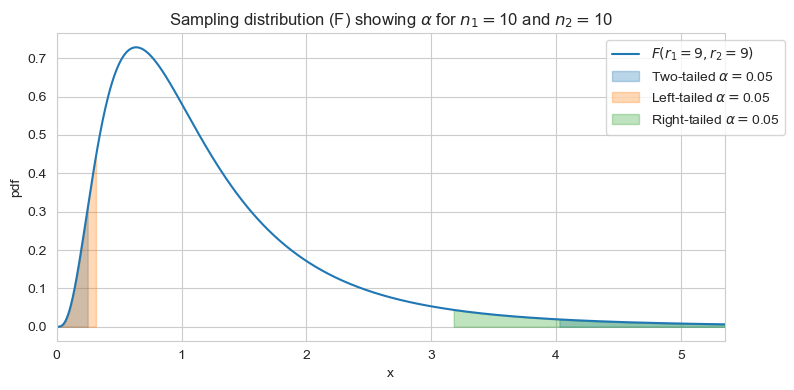

In [7]:
# Plot of two-sided test distributions with alpha
n1 = 10
dfn = n1 - 1
n2 = 10
dfd = n2 - 1
alpha = 0.05

dist1 = stats.f(dfn=dfn, dfd=dfd)
rt_stop = dist1.isf(q=0.01)

pdf_x = np.linspace(start=0, stop=rt_stop, num=1000)  
pdf1 = [(dist1.pdf(x=x)) for x in pdf_x]

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(pdf_x, pdf1, label=f'$F(r_1={dfn}, r_2={dfd})$')

# Plot alpha area (two-tailed)
fill_alpha_left = np.linspace(start=0, stop=dist1.ppf(alpha/2), num=1000)
fill_left = [(dist1.pdf(x=x)) for x in fill_alpha_left]
ax.fill_between(x=fill_alpha_left, y1=0, y2=fill_left, color='C0', alpha=0.3, 
                label=r'Two-tailed $\alpha = $'+f'{alpha:.2f}')
fill_alpha_right = np.linspace(start=dist1.isf(alpha/2), stop=rt_stop, num=1000)
fill_right = [(dist1.pdf(x=x)) for x in fill_alpha_right]
ax.fill_between(x=fill_alpha_right, y1=0, y2=fill_right, color='C0', alpha=0.3)

# Plot alpha area (one-tailed)
if True:  # Change to false to remove one-tailed
    fill_alpha_left = np.linspace(start=0, stop=dist1.ppf(alpha), num=1000)
    fill_left = [(dist1.pdf(x=x)) for x in fill_alpha_left]
    ax.fill_between(x=fill_alpha_left, y1=0, y2=fill_left, color='C1', alpha=0.3, 
                    label=r'Left-tailed $\alpha = $'+f'{alpha:.2f}')
    fill_alpha_right = np.linspace(start=dist1.isf(alpha), stop=rt_stop, num=1000)
    fill_right = [(dist1.pdf(x=x)) for x in fill_alpha_right]
    ax.fill_between(x=fill_alpha_right, y1=0, y2=fill_right, color='C2', alpha=0.3, 
                    label=r'Right-tailed $\alpha = $'+f'{alpha:.2f}')

# Tweak graphic
ax.set_title(r'Sampling distribution (F) showing $\alpha$ for $n_1 = $'+f'{n1} and '+r'$n_2 = $'+f'{n2}')
ax.set_ylabel('pdf')
ax.set_xlabel('x')
ax.set_xlim(0, rt_stop)
ax.legend(bbox_to_anchor=(1.1,1))
fig.tight_layout()

Functions for the F test:

In [8]:
def F_2samp_var_stats(var1, var2, n1, n2, alternative='two-sided'):
    '''
    This function runs the two-sample F test for variance based on
    known values. Use F_2samp_var_data if you have raw data.
    
    Inputs:
    var1     : the observed variance for sample 1
    var2     : the observed variance for sample 2
    n1       : the sample size for sample 1
    n2       : the sample size for sample 2
    alternative : the alternative hypothesis ('two-sided', 'greater', 'less')
    
    Returns:
    test   : the F test statistic
    pval   : the p-value for the test
    '''
    import math
    import scipy.stats as stats
    dist = stats.f(dfn=n1-1, dfd=n2-1)
    test = var1/var2
    pval = 0
    if alternative == 'less':
        pval = dist.cdf(test)
    elif alternative == 'greater':
        pval = dist.sf(test)
    else:
        pval = 2 * min(dist.cdf(test),dist.sf(test))
    return test, pval

In [9]:
def F_2samp_var_data(data1, data2, alternative='two-sided'):
    '''
    This function runs the two-sample F test for variance based on
    raw data. Use F_2samp_var_stats if you have summary statistics.
    
    Inputs:
    data1   : sample 1
    data2   : sample 2
    alternative : the alternative hypothesis ('two-sided', 'greater', 'less')
    
    Returns:
    test   : the F test statistic
    pval   : the p-value for the test
    '''
    import math
    import scipy.stats as stats
    import numpy as np
    var1 = np.var(data1, ddof=1)
    var2 = np.var(data2, ddof=1)
    n1 = len(data1)
    n2 = len(data2)
    dist = stats.f(dfn=n1-1, dfd=n2-1)
    test = var1/var2
    pval = 0
    if alternative == 'less':
        pval = dist.cdf(test)
    elif alternative == 'greater':
        pval = dist.sf(test)
    else:
        pval = 2 * min(dist.cdf(test),dist.sf(test))
    return test, pval

***

A two-sample t-test is planned to determine if there are significant differences in mean time to failure (MTTF) of an electronic component constructed using an old versus new methodology.

* A random sample of 15 components constructed with the old method resulted in a MTTF of 65 hours with sample variance of 5 hours.
* A random sample of 18 components constructed with the new method resulted in a MTTF of 75 hours with a sample variance of 8 hours.

Is there enough evidence to conclude that the variance differs? Assume 𝛼=0.05.

In [10]:
var1 = 5
var2 = 8
n1 = 15
n2 = 18
alternative = 'two-sided'
F_2samp_var_stats(var1=var1, var2=var2, n1=n1, n2=n2, alternative='two-sided')

(0.625, 0.37950927903309983)

We fail to reject the null hypothesis. There is insufficient evidence to conclude that the variance varies between the two samples. This supports pooling of variance for the t-test.

Using that problem to generate fake data to demonstrate the other function:

In [11]:
data1 = stats.norm(loc=65, scale=math.sqrt(5)).rvs(size=15)
data2 = stats.norm(loc=75, scale=math.sqrt(8)).rvs(size=18)
F_2samp_var_data(data1, data2, alternative='two-sided')

(0.3178385965706514, 0.03556451448082093)